In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import nltk
import string

from collections import Counter
from collections import defaultdict
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')



[nltk_data] Downloading package stopwords to /home/pablo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("dataset/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [3]:
#Convierto el texto de a String

df['text'] = df['text'].astype("string")

#Divido en palabras en una nueva columna y asigno la cantidad de palabras por cada tweet
df['palabras'] = df['text'].str.split().str.len()
df

,id,keyword,location,text,target,palabras
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,20
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,19


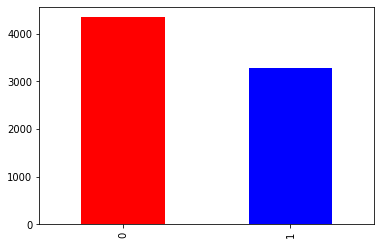

In [4]:
#Cantidad de filas de tweets verdaderos y falsos.
df['target'].value_counts().plot.bar(color=(['red','blue']))

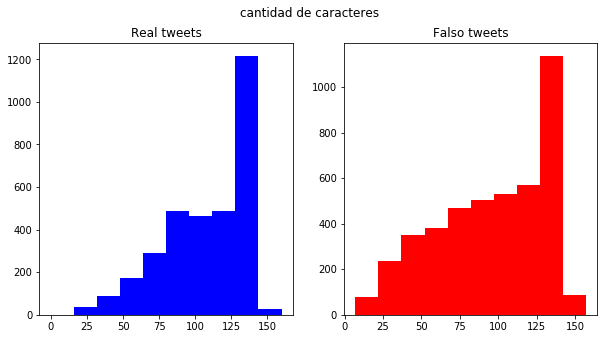

In [5]:
#Analizo distribucion de la cantidad de caracteres para ambos grupos
dfreal = df[df['target']==1]
dffalso = df[df['target']==0]

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
dfreal_graph=df[df['target']==1]['text'].str.len()
ax1.hist(dfreal_graph,range=(0,160),color='blue')
ax1.set_title('Real tweets')
dffalso_graph=df[df['target']==0]['text'].str.len()
ax2.hist(dffalso_graph,color='red')
ax2.set_title('Falso tweets')
fig.suptitle('cantidad de caracteres')
plt.show()

In [6]:
display(dfreal.text.str.len().describe())
dffalso.text.str.len().describe()

count    3271.000000
mean      108.113421
std        29.309854
min        14.000000
25%        88.000000
50%       115.000000
75%       136.000000
max       151.000000
Name: text, dtype: float64

count    4342.000000
mean       95.706817
std        35.885924
min         7.000000
25%        68.000000
50%       101.000000
75%       130.000000
max       157.000000
Name: text, dtype: float64

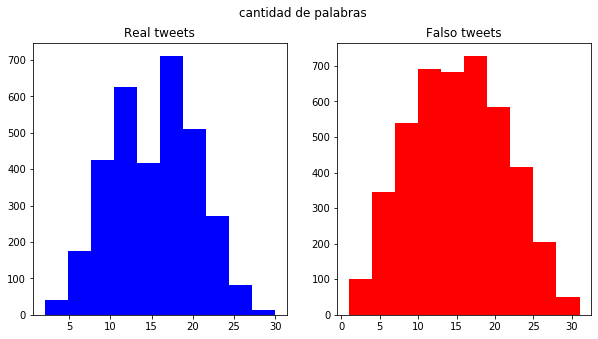

In [7]:

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
dfreal_graph2=df[df['target']==1]['palabras']
ax1.hist(dfreal_graph2,color='blue')
ax1.set_title('Real tweets')
dffalso_graph2=df[df['target']==0]['palabras']
ax2.hist(dffalso_graph2,color='red')
ax2.set_title('Falso tweets')
fig.suptitle('cantidad de palabras')
plt.show()

In [8]:
#Analizamos longitud, promedio, de los tweets falsos y cantidad de palabras.
df[df['target']==0]['palabras'].describe()

count    4342.000000
mean       14.704744
std         6.161564
min         1.000000
25%        10.000000
50%        15.000000
75%        19.000000
max        31.000000
Name: palabras, dtype: float64

In [9]:
#Analizamos longitud, promedio, de los tweets reales y cantidad de palabras.
df[df['target']==1]['palabras'].describe()

count    3271.000000
mean       15.167533
std         5.096806
min         2.000000
25%        11.000000
50%        15.000000
75%        19.000000
max        30.000000
Name: palabras, dtype: float64

In [10]:
#EN ESTE PRIMER ANALISIS SE VERIFICA QUE EXISTE UNA TENDENCIA A QUE LOS TWEETS CON MAYOR LONGITUD SEAN FALSOS
#COMO TAMBIEN EL PROMEDIO DE MAYOR CANTIDAD DE PALABRAS PARA LOS TWEETS FALSOS.

In [11]:
#ANALIZAMOS LAS PALABRAS CON MAYOR APARICIONES EN AMBOS GRUPOS

In [12]:
# 1ero CONVIERTO A MINUSCULAS TODOS LOS CARACTERES
df['text'] = df['text'].str.lower()

def creo_list_palabras(target):
    lista_palabras=[]
    
    for x in df[df['target']==target]['text'].str.split():
        for i in x:
            lista_palabras.append(i)
    return lista_palabras

palabras_falsos = creo_list_palabras(0)
palabras_reales = creo_list_palabras(1)



In [13]:
display(Counter(" ".join(dffalso["text"]).split()).most_common(20))
Counter(" ".join(dfreal["text"]).split()).most_common(20)

[('the', 1524),
 ('a', 1115),
 ('to', 1099),
 ('I', 938),
 ('and', 840),
 ('of', 834),
 ('in', 720),
 ('you', 529),
 ('is', 512),
 ('for', 452),
 ('my', 442),
 ('on', 387),
 ('-', 374),
 ('with', 349),
 ('that', 326),
 ('The', 295),
 ('it', 290),
 ('be', 268),
 ('like', 233),
 ('this', 225)]

[('the', 1051),
 ('in', 1037),
 ('of', 888),
 ('a', 730),
 ('to', 706),
 ('and', 462),
 ('-', 389),
 ('on', 386),
 ('for', 368),
 ('is', 302),
 ('at', 273),
 ('I', 259),
 ('The', 257),
 ('by', 244),
 ('from', 206),
 ('A', 167),
 ('that', 166),
 ('with', 159),
 ('was', 158),
 ('are', 150)]

<BarContainer object of 20 artists>

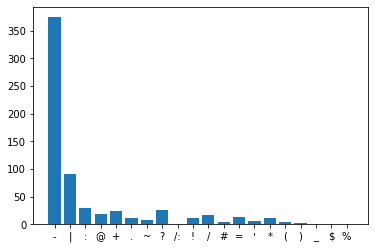

In [14]:
dic=defaultdict(int)
signos = string.punctuation
for i in (palabras_falsos):
    if i in signos:
        dic[i]+=1
x,y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 18 artists>

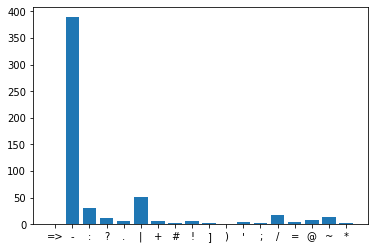

In [15]:
dic2=defaultdict(int)
for i in (palabras_reales):
    if i in signos:
        dic2[i]+=1
x,y=zip(*dic2.items())
plt.bar(x,y)

In [16]:
#FUNCION ELIMINAR URLS

def borrar_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)


# Dada una lista de palabras, retira cualquiera que esté
# en la lista de palabras funcionales.

def quitarPalabrasvac(listaPalabras, palabrasvac):
    return [w for w in listaPalabras if w not in palabrasvac]

In [17]:
#CUENTO LA CANTIDAD DE APARICIONES AUNQUE EN ESTE ANALISIS SOLO USARE SI APARECE O NO.
import warnings
warnings.filterwarnings('ignore')

dffalso['?'] = dffalso.text.str.count('\?') #TEXTO QUE CONTIENE ALGUNA PREGUNTA
dffalso['!'] = dffalso.text.str.count('\!') #TEXTO QUE CONTIENE ALGUNA EXCLAMACION
dffalso['@'] = dffalso.text.str.count('\@') #TEXTO QUE CONTIENE ALGUNA CITACION
dffalso['#'] = dffalso.text.str.count('\#') #TEXTO QUE CONTIENE ALGUN HASHTAG
dffalso['http'] = dffalso.text.str.contains('http') #TEXTO QUE CONTIENE ALGUNA FUENTE



In [18]:
dfreal['?'] = dfreal.text.str.count('\?')
dfreal['!'] = dfreal.text.str.count('\!')
dfreal['@'] = dfreal.text.str.count('\@')
dfreal['#'] = dfreal.text.str.count('\#')
dfreal['http'] = dfreal.text.str.contains('http')


In [19]:

dffalso3000 = dffalso.iloc[:3000][['?','!','@','#','http']]  #SELECCIONO SOLO LOS PRIMEROS 3000 TWEETS YA QUE SON MENOS
dfreal3000 = dfreal.iloc[:3000][['?','!','@','#','http']]   #SELECCIONO SOLO LOS PRIMEROS 3000 TWEETS YA QUE SON MAS
display (dffalso3000.sum())
dfreal3000.sum()


?       1707.0
!        596.0
@       1265.0
#       1223.0
http    1268.0
dtype: float64

?        709.0
!        307.0
@        855.0
#       1547.0
http    1987.0
dtype: float64

In [20]:
display (dfreal[(dfreal[['?','!','@','#']]>0)].count() / dfreal.count() * 100 )
dffalso[(dffalso[['?','!','@','#']]>0)].count() / dffalso.count() * 100 

id           0.000000
keyword      0.000000
location     0.000000
text         0.000000
target       0.000000
palabras     0.000000
?            8.926934
!            5.992051
@           20.666463
#           26.750229
http         0.000000
dtype: float64

id           0.000000
keyword      0.000000
location     0.000000
text         0.000000
target       0.000000
palabras     0.000000
?           17.273146
!           12.045140
@           31.391064
#           20.405343
http         0.000000
dtype: float64

In [21]:
display (dfreal[(dfreal['?']>0)|(dfreal['!']>0)].shape[0] / dfreal.shape[0] * 100)
dffalso[(dffalso['?']>0)|(dffalso['!']>0)].shape[0] / dffalso.shape[0] * 100

14.154692754509323

27.245508982035926

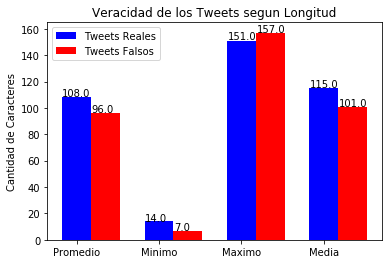

In [22]:
etiquetas = ['Promedio', 'Minimo', 'Maximo', 'Media']

yreal = [dfreal.text.str.len().mean().round(), dfreal.text.str.len().min(), dfreal.text.str.len().max(), dfreal.text.str.len().median() ]
yfalso = [dffalso.text.str.len().mean().round(), dffalso.text.str.len().min(), dffalso.text.str.len().max(), dffalso.text.str.len().median()]

x = np.arange(len(etiquetas))
y = np.arange(0, 180, 20)

barw = 0.35

fig,ax = plt.subplots()

bar_real = ax.bar(x,yreal,width=barw, label='Tweets Reales', color='blue',zorder=2)
bar_falso = ax.bar(x + barw,yfalso,width=barw,label='Tweets Falsos',color='red',zorder=2)

ax.set_title('Veracidad de los Tweets segun Longitud')
ax.set_ylabel('Cantidad de Caracteres')

ax.set_xticks(x)
ax.set_xticklabels(etiquetas)

ax.set_yticks(y)
ax.set_yticklabels(y)

ax.legend()

for p in ax.patches:
    ax.annotate(np.round(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


In [23]:
dfreal[dfreal['http']==True].shape[0] / df.shape[0] * 100

28.530145803231317

In [24]:
dffalso[dffalso['http']==True].shape[0] / df.shape[0] * 100

23.630631814002363

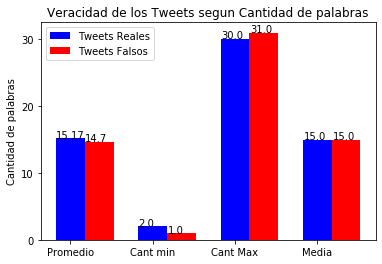

In [25]:
etiquetas2 = ['Promedio', 'Cant min', 'Cant Max', 'Media']

ycantreal = [dfreal.palabras.mean(), dfreal.palabras.min(), dfreal.palabras.max(), dfreal.palabras.median() ]
ycantfalso = [dffalso.palabras.mean(), dffalso.palabras.min(), dffalso.palabras.max(), dffalso.palabras.median() ]

x2 = np.arange(len(etiquetas2))
y2 = np.arange(0, 40, 10)

barw2 = 0.35

fig2,ax2 = plt.subplots()

bar_real2 = ax2.bar(x2,ycantreal,width=barw2, label='Tweets Reales', color='blue',zorder=2)
bar_falso2 = ax2.bar(x2 + barw2,ycantfalso,width=barw2,label='Tweets Falsos',color='red',zorder=2)

ax2.set_title('Veracidad de los Tweets segun Cantidad de palabras')
ax2.set_ylabel('Cantidad de palabras')

ax2.set_xticks(x2)
ax2.set_xticklabels(etiquetas2)

ax2.set_yticks(y2)
ax2.set_yticklabels(y2)

ax2.legend()

for p in ax2.patches:
    ax2.annotate(np.round(p.get_height(),decimals=2), (p.get_x() * 1.005, p.get_height() * 1.005))
    


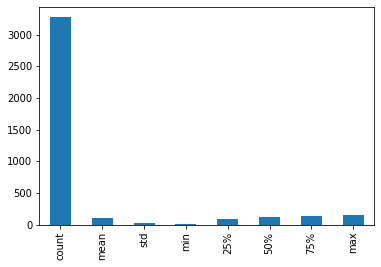

In [26]:
dfreal.text.str.len().describe().plot.bar()